In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
import pickle
with open("C:/Users/passion/jupyter/열정에 시동/result.pickle","rb") as fr:
    result=pickle.load(fr)

In [3]:
import pickle
with open("C:/Users/passion/jupyter/열정에 시동/RFML.pickle","rb") as fr:
    RFML=pickle.load(fr)

여기서 result는 모든 pdde,cop_u,lpay를 포함한 모든 transaction 데이터이고<br>
RFML은 우리의 기준에 맞게 고객들을 분류해놓은 데이터이다

In [4]:
result.head()

,CUST,MA_FEM_DV,AGES,C_ZON_HLV,BUY_AM,COP_C,CHNL_DV,PD_C,BUY_CT,S_ZON_HLV,DE_DT,MONTH,DATE,DAY,DE_HR,CLAC_HLV_NM,CLAC_MCLS_NM,PD_NM,LPAY_USE
0,M430112881,0,50,17,15000,110,1,290,1,10,2021-01-01,1,1,4,10,남성의류,남성의류상의,남성티셔츠,0
1,M646853852,0,40,13,79700,110,1,1369,1,13,2021-01-01,1,1,4,10,주방잡화,주방일회용품,기타주방일회용품,0
2,M430112881,0,50,17,19000,110,1,290,1,10,2021-01-01,1,1,4,10,남성의류,남성의류상의,남성티셔츠,0
3,M430112881,0,50,17,19000,110,1,290,1,10,2021-01-01,1,1,4,10,남성의류,남성의류상의,남성티셔츠,0
4,M430112881,0,50,17,19000,110,1,290,1,10,2021-01-01,1,1,4,10,남성의류,남성의류상의,남성티셔츠,0


In [5]:
RFML.head()

,CUST,Recency_R,Frequency_F,Monetary_M,LPAY_USE
0,M000034966,1,0,0,0
1,M000059535,0,0,0,0
2,M000136117,1,0,1,1
3,M000201112,0,0,0,0
4,M000225114,1,0,0,0


그룹별 분석을 하기위해서는 그룹별 cust의 사람들을 다 알아야 하는데 그건 아래의 코드로 구할수가 있다<br>
group의 기준에 따라 cust와 그에 해당하는 transaction으로 나눠놨다.

In [6]:
for a in range(2):
    for b in range (2):
        for c in range(2):
            for d in range(3):
                globals()['group'+str(a)+str(b)+str(c)+str(d)] = RFML[(RFML["Recency_R"] == a) & (RFML["Frequency_F"] == b) & (RFML["Monetary_M"] == c) & (RFML["LPAY_USE"] == d) ]
                globals()['cust'+str(a)+str(b)+str(c)+str(d)] = globals()['group'+str(a)+str(b)+str(c)+str(d)]['CUST']
                globals()['transaction'+str(a)+str(b)+str(c)+str(d)] = pd.merge(result, globals()['cust'+str(a)+str(b)+str(c)+str(d)])

In [9]:
group1112.head()

,CUST,Recency_R,Frequency_F,Monetary_M,LPAY_USE
48,M001808316,1,1,1,2
124,M004839058,1,1,1,2
135,M005209297,1,1,1,2
150,M005701809,1,1,1,2
184,M006679751,1,1,1,2


In [10]:
transaction1112.head()

,CUST,MA_FEM_DV,AGES,C_ZON_HLV,BUY_AM,COP_C,CHNL_DV,PD_C,BUY_CT,S_ZON_HLV,DE_DT,MONTH,DATE,DAY,DE_HR,CLAC_HLV_NM,CLAC_MCLS_NM,PD_NM,LPAY_USE
0,M886923095,0,40,17,5200,110,1,1181,1,10,2021-01-01,1,1,4,11,음료,커피음료,커피음료,0
1,M886923095,0,40,17,5000,110,1,1192,1,17,2021-01-05,1,5,1,14,인테리어/조명,장식용품,장식소품,0
2,M886923095,0,40,17,5500,110,1,232,1,17,2021-01-05,1,5,1,14,과자,스낵류,일반스낵,0
3,M886923095,0,40,17,2700,110,1,1255,1,17,2021-01-19,1,19,1,14,조리식품,베이커리,베이커리일반빵,0
4,M886923095,0,40,17,6500,110,1,1255,1,17,2021-01-19,1,19,1,14,조리식품,베이커리,베이커리일반빵,0


## 기준에 따른 사람과 총합계BUY_AM 데이터프레임만들기

이제 우리의 기준에 맞게 분류한 사람들이 몇명으로 이루어져있고 총합계금액이 얼마인지를 알아보는 데이터프레임을 만들겠다.

In [11]:
group = RFML.groupby(["Recency_R","Frequency_F", "Monetary_M","LPAY_USE"])["CUST"].apply(pd.DataFrame)
group =group.transpose().reset_index()
group

,level_0,level_1,level_2,level_3,0,1,2,3,4,5,...,29864,29865,29866,29867,29868,29869,29870,29871,29872,29873
0,0,0,0,0,NaN,M000059535,NaN,M000201112,NaN,NaN,...,M999492154,M999493501,NaN,NaN,NaN,M999708287,NaN,NaN,NaN,NaN
1,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,M999599111,NaN,NaN,NaN,NaN,NaN,NaN
6,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,1,0,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
group.columns

Index(['level_0', 'level_1', 'level_2', 'level_3',         0,         1,
               2,         3,         4,         5,
       ...
           29864,     29865,     29866,     29867,     29868,     29869,
           29870,     29871,     29872,     29873],
      dtype='object', length=29878)

컬럼을 보고 group별 정보가 있는 dataframe을 따로 만들어놓는다

In [13]:
cust_group = group[['level_0', 'level_1', 'level_2', 'level_3']]
cust_group.columns = ['Recency_R', 'Frequency_F', 'Monetary_M','LPAY_USE']
cust_group

,Recency_R,Frequency_F,Monetary_M,LPAY_USE
0,0,0,0,0
1,0,0,0,1
2,0,0,0,2
3,0,0,1,0
4,0,0,1,1
5,0,0,1,2
6,0,1,0,0
7,0,1,0,1
8,0,1,0,2
9,0,1,1,0


group별 고객이 몇명있는지에 대한 count를 한 뒤 데이터 프레임 형식에 맞게 cust_count라는 변수에 저장을 한다

In [14]:
cust_count = group.drop(['level_0', 'level_1', 'level_2', 'level_3'], axis=1)
cust_count

,0,1,2,3,4,5,6,7,8,9,...,29864,29865,29866,29867,29868,29869,29870,29871,29872,29873
0,NaN,M000059535,NaN,M000201112,NaN,NaN,NaN,NaN,NaN,NaN,...,M999492154,M999493501,NaN,NaN,NaN,M999708287,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,M999599111,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
cust_sum =  cust_count.count(axis=1)
cust_sum = pd.Series.to_frame(cust_sum)
cust_sum.columns = ['cust_sum']
cust_sum

,cust_sum
0,7186
1,395
2,335
3,377
4,97
5,36
6,286
7,51
8,1
9,80


그럼 이제 group별로 buy_am의 총합을 볼 수 있는 열을 만들겠다.<br>
아래의 코드는 group의 기준에 따라 buy_am의 총합을 구한것이다.

In [16]:
for a in range(2):
    for b in range (2):
        for c in range(2):
            for d in range(3):
                globals()['buy_am_sum'+str(a)+str(b)+str(c)+str(d)] = globals()['transaction'+str(a)+str(b)+str(c)+str(d)]['BUY_AM'].sum()


In [17]:
buy_am_sum = []
for a in range(2):
    for b in range (2):
        for c in range(2):
            for d in range(3):
                buy_am_sum.append(globals()['buy_am_sum'+str(a)+str(b)+str(c)+str(d)])

In [18]:
buy_am_sum

[3037727111,
 412714708,
 208557190,
 2864858880,
 1036739384,
 321100215,
 448332580,
 91819981,
 1570135,
 597594732,
 500089634,
 288565584,
 6381998001,
 1972496681,
 612591789,
 12798883576,
 10279962542,
 4004066587,
 4315845693,
 1659522731,
 263685834,
 17384013850,
 43477160645,
 15222990505]

In [19]:
buy_am_sum = pd.DataFrame({"buy_am_sum":buy_am_sum})
buy_am_sum

,buy_am_sum
0,3037727111
1,412714708
2,208557190
3,2864858880
4,1036739384
5,321100215
6,448332580
7,91819981
8,1570135
9,597594732


그리고 만든 데이터 3개를 concant을 시키면 된다.<br>
그럼 이제 글룹별로 cust가 몇명인지 그리고 그 그룹에 속하는 사람들의 총 합계구맥을 한눈에 보는 dataframe이 만들어진거다.

In [20]:
data =  pd.concat([cust_group,cust_sum,buy_am_sum],axis = 1)
data

,Recency_R,Frequency_F,Monetary_M,LPAY_USE,cust_sum,buy_am_sum
0,0,0,0,0,7186,3037727111
1,0,0,0,1,395,412714708
2,0,0,0,2,335,208557190
3,0,0,1,0,377,2864858880
4,0,0,1,1,97,1036739384
5,0,0,1,2,36,321100215
6,0,1,0,0,286,448332580
7,0,1,0,1,51,91819981
8,0,1,0,2,1,1570135
9,0,1,1,0,80,597594732


## 그룹별 분석

buy_am_sum을 기준으로 내림차순을 보고 중요도에 따른 그룹별 분석을 시작하겠다.

In [19]:
data_sorted = data.sort_values(by='buy_am_sum',ascending = False)
data_sorted

,Recency_R,Frequency_F,Monetary_M,LPAY_USE,cust_sum,buy_am_sum
22,1,1,1,1,2931,43477160645
21,1,1,1,0,1966,17384013850
23,1,1,1,2,882,15222990505
15,1,0,1,0,1435,12798883576
16,1,0,1,1,841,10279962542
12,1,0,0,0,7217,6381998001
18,1,1,0,0,2421,4315845693
17,1,0,1,2,443,4004066587
0,0,0,0,0,7186,3037727111
3,0,0,1,0,377,2864858880


### cust1111

RFML이 1111 즉 vip L이 가장 사람이 많으니 일단 이 그룹에 대해서 분석을 시작해보겠다.

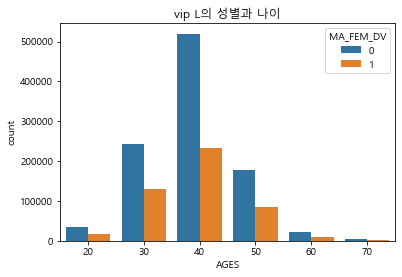

In [24]:
sns.countplot(x="AGES", hue="MA_FEM_DV", data = transaction1111)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("vip L의 성별과 나이")
plt.show()

과연 사람들은 거주지와 구매점포지역이 같을까??해서 찍어봄

In [21]:
a = transaction1111[(transaction1111['C_ZON_HLV'] ==transaction1111['S_ZON_HLV'] )]

In [22]:
a.columns

Index(['CUST', 'MA_FEM_DV', 'AGES', 'C_ZON_HLV', 'BUY_AM', 'COP_C', 'CHNL_DV',
       'PD_C', 'BUY_CT', 'S_ZON_HLV', 'DE_DT', 'MONTH', 'DATE', 'DAY', 'DE_HR',
       'CLAC_HLV_NM', 'CLAC_MCLS_NM', 'PD_NM', 'LPAY_USE'],
      dtype='object')

In [23]:
b  = a.groupby("CUST").mean()
b

,MA_FEM_DV,AGES,C_ZON_HLV,BUY_AM,COP_C,CHNL_DV,PD_C,BUY_CT,S_ZON_HLV,MONTH,DATE,DAY,DE_HR,LPAY_USE
CUST,,,,,,,,,,,,,,
M000494848,0.0,30.0,10.0,91466.880734,115.091743,1.000000,887.050459,1.119266,10.0,4.880734,14.036697,3.298165,13.633028,0.0
M000557840,1.0,30.0,11.0,5737.895062,120.895062,1.000000,927.070988,1.077160,11.0,6.410494,14.216049,3.962963,16.811728,0.0
M001444118,1.0,30.0,17.0,10123.684647,127.531120,1.000000,1125.033195,1.124481,17.0,5.881743,14.500000,3.265560,15.877593,0.0
M001714196,0.0,40.0,17.0,13211.000000,124.892857,1.000000,857.471429,1.200000,17.0,7.453571,15.200000,2.310714,14.285714,0.0
M002009440,0.0,30.0,16.0,31887.619048,234.523810,1.000000,2066.464286,1.130952,16.0,7.702381,18.083333,2.928571,15.785714,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M998579559,1.0,40.0,17.0,13558.984802,132.401216,1.000000,1092.778116,1.079027,17.0,6.848024,15.644377,2.416413,14.000000,0.0
M998680257,0.0,40.0,17.0,28818.430556,127.083333,1.000000,994.370370,1.013889,17.0,6.532407,17.944444,4.930556,17.629630,0.0
M998905712,1.0,40.0,17.0,28666.666667,291.333333,1.000000,3475.233333,1.000000,17.0,5.166667,19.333333,5.066667,14.933333,0.0


일단 조건을 걸면 lpay쓴 거래기록이 다 사라져서 lpay에 대한 마케팅은 불가능하고<br>
lpay를 유무를 모르지만 안 쓴 transaction에 대해서는 대부분이 거주지와 구매점포지역이 같다